In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import random
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
#let's make dataframe. Used car auction
SIZE = 100000

car_distance = abs(stats.norm.rvs(loc = 100, scale = 50,size = SIZE ))
brands = ['VW','Skoda', 'Mini', 'MB', 'BMW', 'Audi']
probabilities = [.2, .2 , .1 , .3 , .05, .15]
car_brand = np.random.choice(brands, SIZE, p=probabilities)

car_hp = np.round(abs(np.random.choice(200,SIZE) + stats.norm.rvs(loc = 0, scale = 50,size = SIZE ) ),1)

df = pd.DataFrame({ 'car_distance':car_distance, 'car_brand':car_brand, 'car_hp': car_hp}) # collect 'em all

df.head()

,car_distance,car_brand,car_hp
0,117.167784,VW,118.4
1,105.893311,Skoda,75.7
2,80.425183,Audi,47.2
3,99.526848,MB,256.3
4,29.485803,VW,129.0


In [19]:
df = pd.get_dummies(df)    # make columns for car brands like car_brand_MB
df.head()

,car_distance,car_hp,car_brand_Audi,car_brand_BMW,car_brand_MB,car_brand_Mini,car_brand_Skoda,car_brand_VW
0,117.167784,118.4,0,0,0,0,0,1
1,105.893311,75.7,0,0,0,0,1,0
2,80.425183,47.2,1,0,0,0,0,0
3,99.526848,256.3,0,0,1,0,0,0
4,29.485803,129.0,0,0,0,0,0,1


###  we will make special variable: 
- car_hp^2

In [72]:
bias = 9000
# we will make special variable: car_hp**2
car_price = bias - 10 * car_distance  + 0.05 * car_hp**2  # and make target variable

car_price = np.round(car_price,2)

df['car_price'] = car_price
df.head()

,car_distance,car_hp,car_brand_Audi,car_brand_BMW,car_brand_MB,car_brand_Mini,car_brand_Skoda,car_brand_VW,car_hp^2,car_price
0,117.167784,118.4,0,0,0,0,0,1,14018.56,8529.25
1,105.893311,75.7,0,0,0,0,1,0,5730.49,8227.59
2,80.425183,47.2,1,0,0,0,0,0,2227.84,8307.14
3,99.526848,256.3,0,0,1,0,0,0,65689.69,11289.22
4,29.485803,129.0,0,0,0,0,0,1,16641.00,9537.19


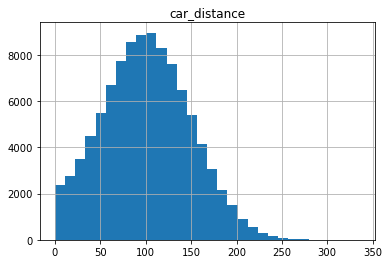

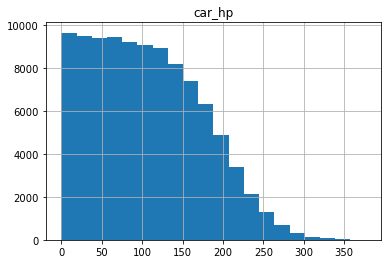

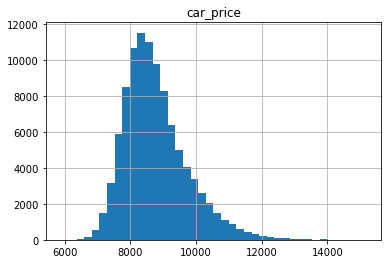

In [42]:
# Visualise columns:
df.car_distance.hist(bins=30)
plt.title('car_distance')
plt.show()

df.car_hp.hist(bins=20)
plt.title('car_hp')
plt.show()

df.car_price.hist(bins=40)
plt.title('car_price');

In [43]:
df = df.drop('car_price',axis=1)

In [44]:
# let's split train test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns], car_price, test_size =0.33 )
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((67000, 9), (33000, 9), (67000,), (33000,))

In [45]:
# call for Linear Regression
lin_reg = LinearRegression(fit_intercept=True,normalize=False,n_jobs=-1)
X_train = scaler.fit_transform(X_train)

In [48]:
# fit linear regression and check score
lin_reg.fit(X_train,y_train)
X_test = scaler.fit_transform(X_test)
lin_reg.score(X_test, y_test)

-3177990221.674133

In [49]:
# check results
list(zip(lin_reg.coef_, df.columns[:-1])), lin_reg.intercept_ 

([(-479.9452956831262, 'car_distance'),
  (-3.432158809069108e-05, 'car_hp'),
  (3426030467.475649, 'car_brand_Audi'),
  (2093954092.979082, 'car_brand_BMW'),
  (4423979114.550824, 'car_brand_MB'),
  (2889518198.3471737, 'car_brand_Mini'),
  (3855182264.0397243, 'car_brand_Skoda'),
  (3848596640.3229656, 'car_brand_VW')],
 8774.354020219002)

Pity, what we can do.. yep, add the special parameter:

### Add the special parameter: 
- car_hp^2

In [50]:
df['car_hp^2'] = car_hp**2 
df.head()

,car_distance,car_hp,car_brand_Audi,car_brand_BMW,car_brand_MB,car_brand_Mini,car_brand_Skoda,car_brand_VW,car_hp^2
0,117.167784,118.4,0,0,0,0,0,1,14018.56
1,105.893311,75.7,0,0,0,0,1,0,5730.49
2,80.425183,47.2,1,0,0,0,0,0,2227.84
3,99.526848,256.3,0,0,1,0,0,0,65689.69
4,29.485803,129.0,0,0,0,0,0,1,16641.00


In [51]:
# let's split train test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns ], car_price, test_size =0.33 )
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((67000, 9), (33000, 9), (67000,), (33000,))

In [52]:
# call for Linear Regression
lin_reg = LinearRegression(fit_intercept=True,normalize=False,n_jobs=-1)
X_train = scaler.fit_transform(X_train)

In [53]:
# fit linear regression and check score
lin_reg.fit(X_train,y_train)
X_test = scaler.fit_transform(X_test)
lin_reg.score(X_test, y_test)

-2569213.3147027623

In [54]:
# check results
list(zip(lin_reg.coef_, df.columns)), lin_reg.intercept_ 

([(-479.8888348504274, 'car_distance'),
  (1.0441508536018773e-05, 'car_hp'),
  (118922115.33972281, 'car_brand_Audi'),
  (72629400.35810602, 'car_brand_BMW'),
  (152967857.40839407, 'car_brand_MB'),
  (100467335.03531167, 'car_brand_Mini'),
  (134251800.68560535, 'car_brand_Skoda'),
  (133372854.77834821, 'car_brand_VW'),
  (848.2480071923644, 'car_hp^2')],
 8777.479510902143)

## Add fines for too large coef_
## (Добавим штрафы за высокие коэффициенты) --> L1 и L2 регуляризация

In [58]:
from sklearn.linear_model import ElasticNet

In [68]:
regr = ElasticNet(l1_ratio=1)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.9999217329377562

In [69]:
list(zip(regr.coef_, df.columns)), regr.intercept_ 

([(-478.8885930215443, 'car_distance'),
  (0.3036857121717663, 'car_hp'),
  (-0.0, 'car_brand_Audi'),
  (0.0, 'car_brand_BMW'),
  (0.0, 'car_brand_MB'),
  (-0.0, 'car_brand_Mini'),
  (-0.0, 'car_brand_Skoda'),
  (0.0, 'car_brand_VW'),
  (846.9583159404542, 'car_hp^2')],
 8777.479510895522)

### Much more better 
Результат стал лучше, программа поняла, что марки машин не иеют значения и обнулила их - что улучшило результат

## By varing regularization approach (L1 or L2 ) we can significantly influnce on model coefs & accuracy
Изменяя вид регуляризации ( L1 или L2) можно существенно влять на коэффициенты и точность

for example lets take L2=1  
Для примера, давайте возьмем L2=1 (квадраты коэффициентов)

In [70]:
regr = ElasticNet(l1_ratio=0)
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12372021779.754375, tolerance: 6361581.2749215495
  model = cd_fast.enet_coordinate_descent(


0.8400440318301043

In [71]:
list(zip(regr.coef_, df.columns)), regr.intercept_ 

([(-239.91998709827118, 'car_distance'),
  (261.1927165992781, 'car_hp'),
  (-1.4080285599758822, 'car_brand_Audi'),
  (0.22869439129314842, 'car_brand_BMW'),
  (0.7823659914500097, 'car_brand_MB'),
  (-0.3682022742711982, 'car_brand_Mini'),
  (-1.312772749267636, 'car_brand_Skoda'),
  (1.8324070218128667, 'car_brand_VW'),
  (299.65193551004126, 'car_hp^2')],
 8777.479510895522)

стало хуже, так как данный вид регуляризации L2 снижает сумму квадратов коэффициентов --> вес car_hp^2 снизился (по сравнению с L1), и марки машин получили веса чтобы уравнять дисбаланс, а мы знаем что это не путь не туда.